In [1]:
# import module
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

# set directry
os.chdir('/Users/celerinoue/0_res/CTOS/')

In [2]:
def data_load(file, file2):
    with open(file, mode="rb") as f:
        data = pickle.load(f)
    print(f'[LOAD]: {file}')

    data2 = pd.read_csv(file2, index_col=0)
    print(f'[LOAD]: {file2}')
    #print(f'input matrix: {data.shape}')
    return data, data2

l_gr, drug_index = data_load(
    './result/matrix/tumor_growth_rate.pickle',
    './result/matrix/drug_index.csv')

[LOAD]: ./result/matrix/tumor_growth_rate.pickle
[LOAD]: ./result/matrix/drug_index.csv


[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Control.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Cetuximab_20mg.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Cetuximab_60mg.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Oxaliplatin_3mg.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Oxaliplatin_10mg.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Irinotecan_3mg.png
[SAVE]: ./result/z_fig/clustering_TumorGrowthRate/fig_clustering_Irinotecan_10mg.png


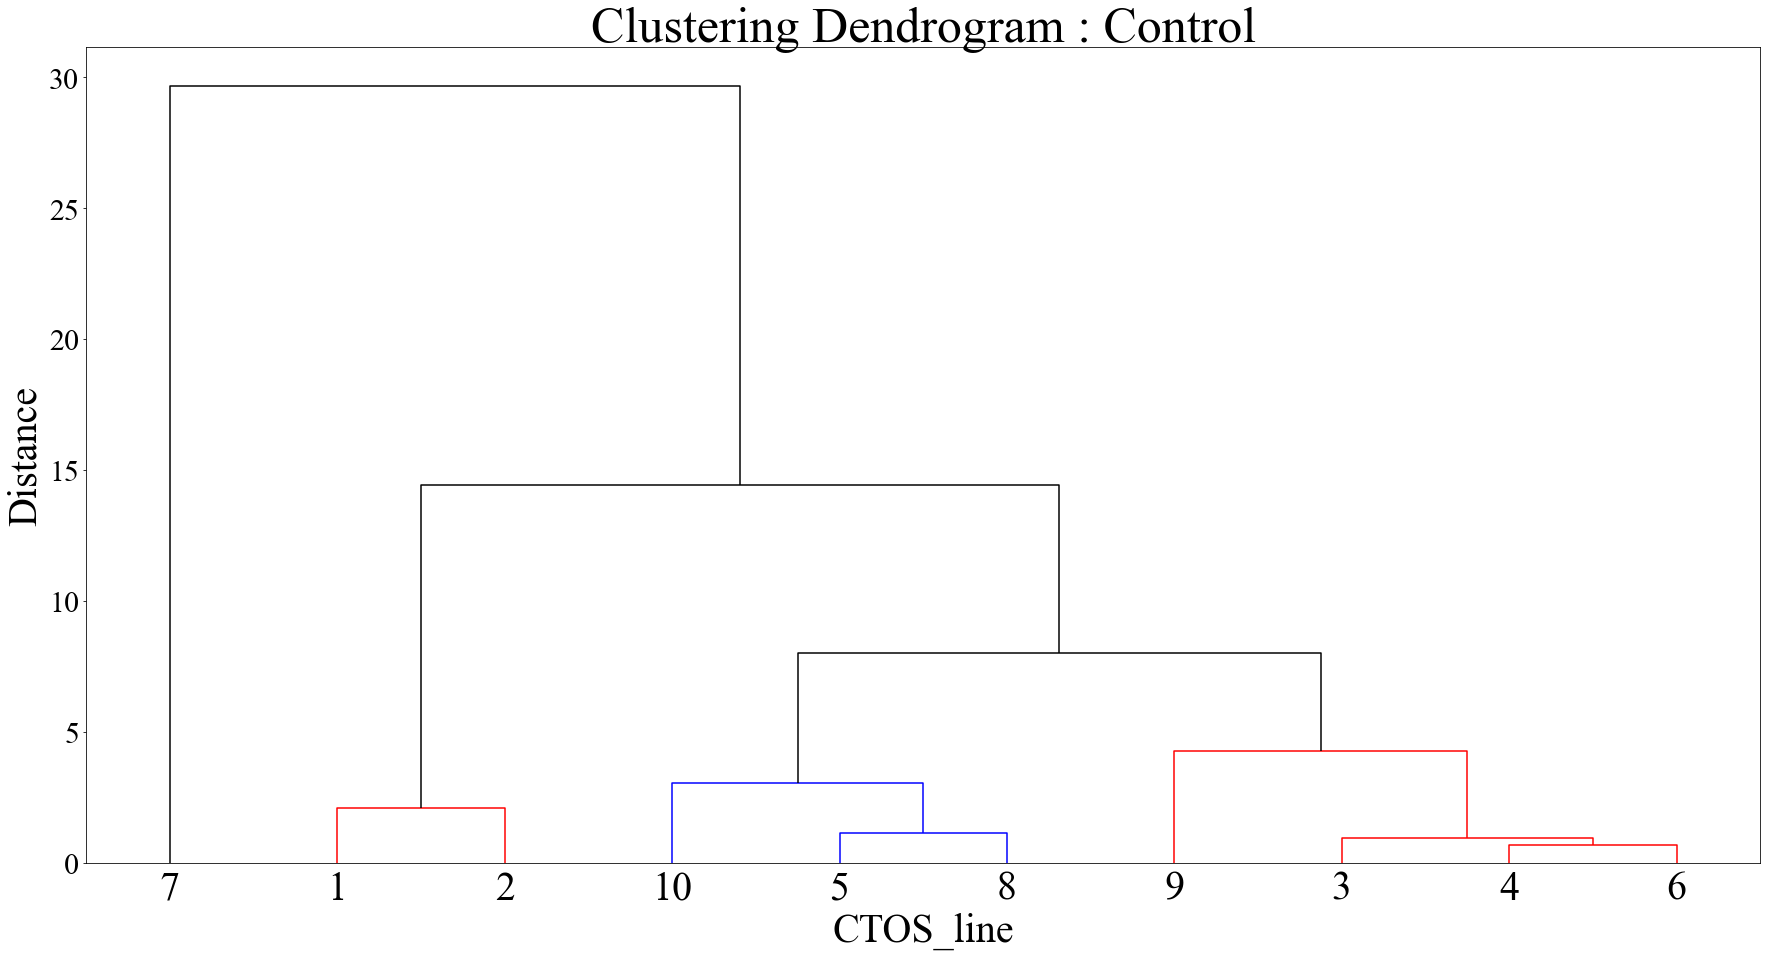

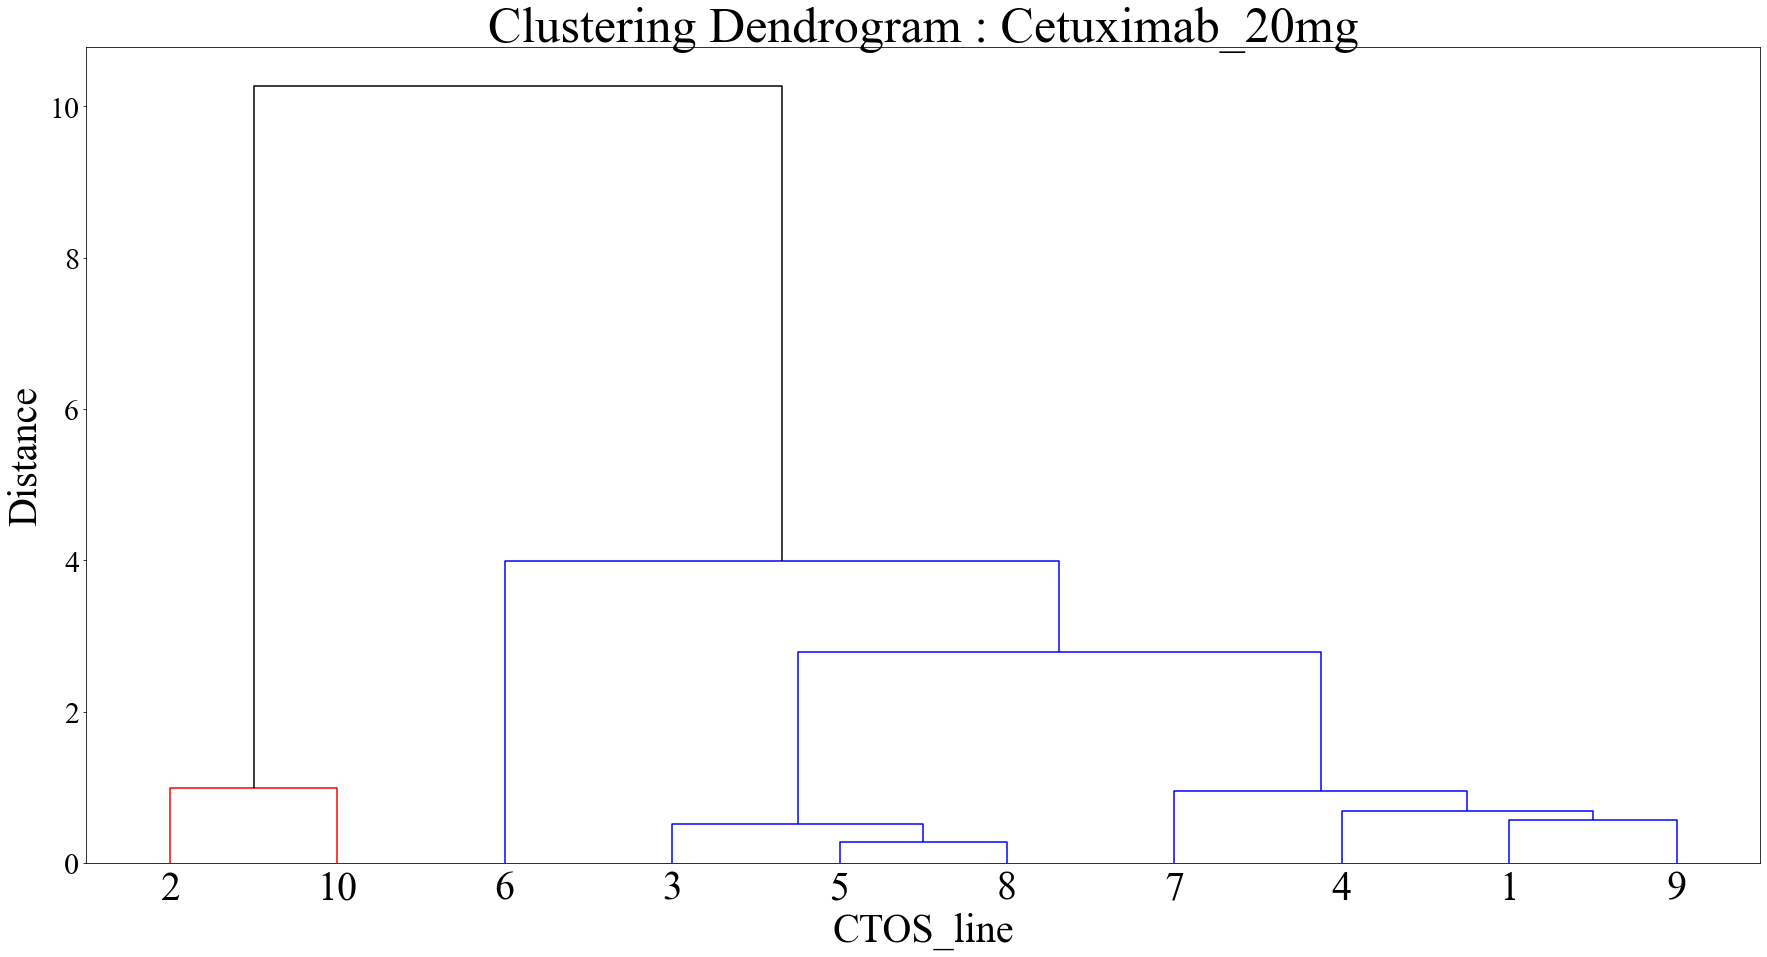

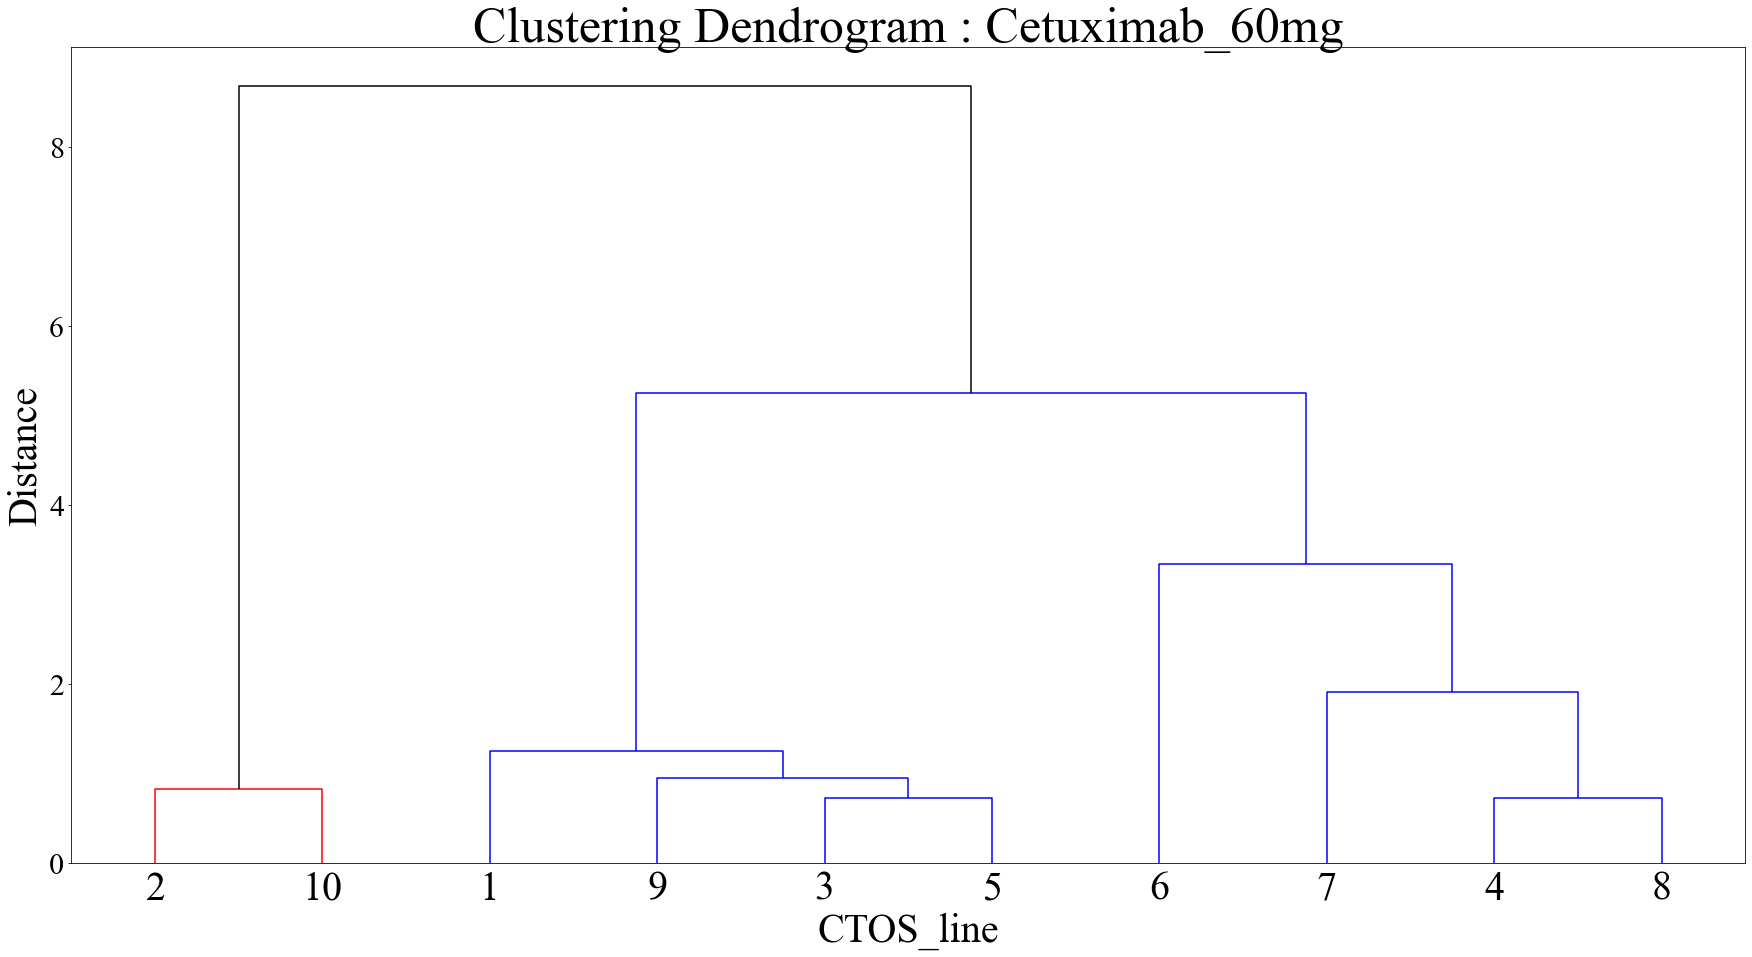

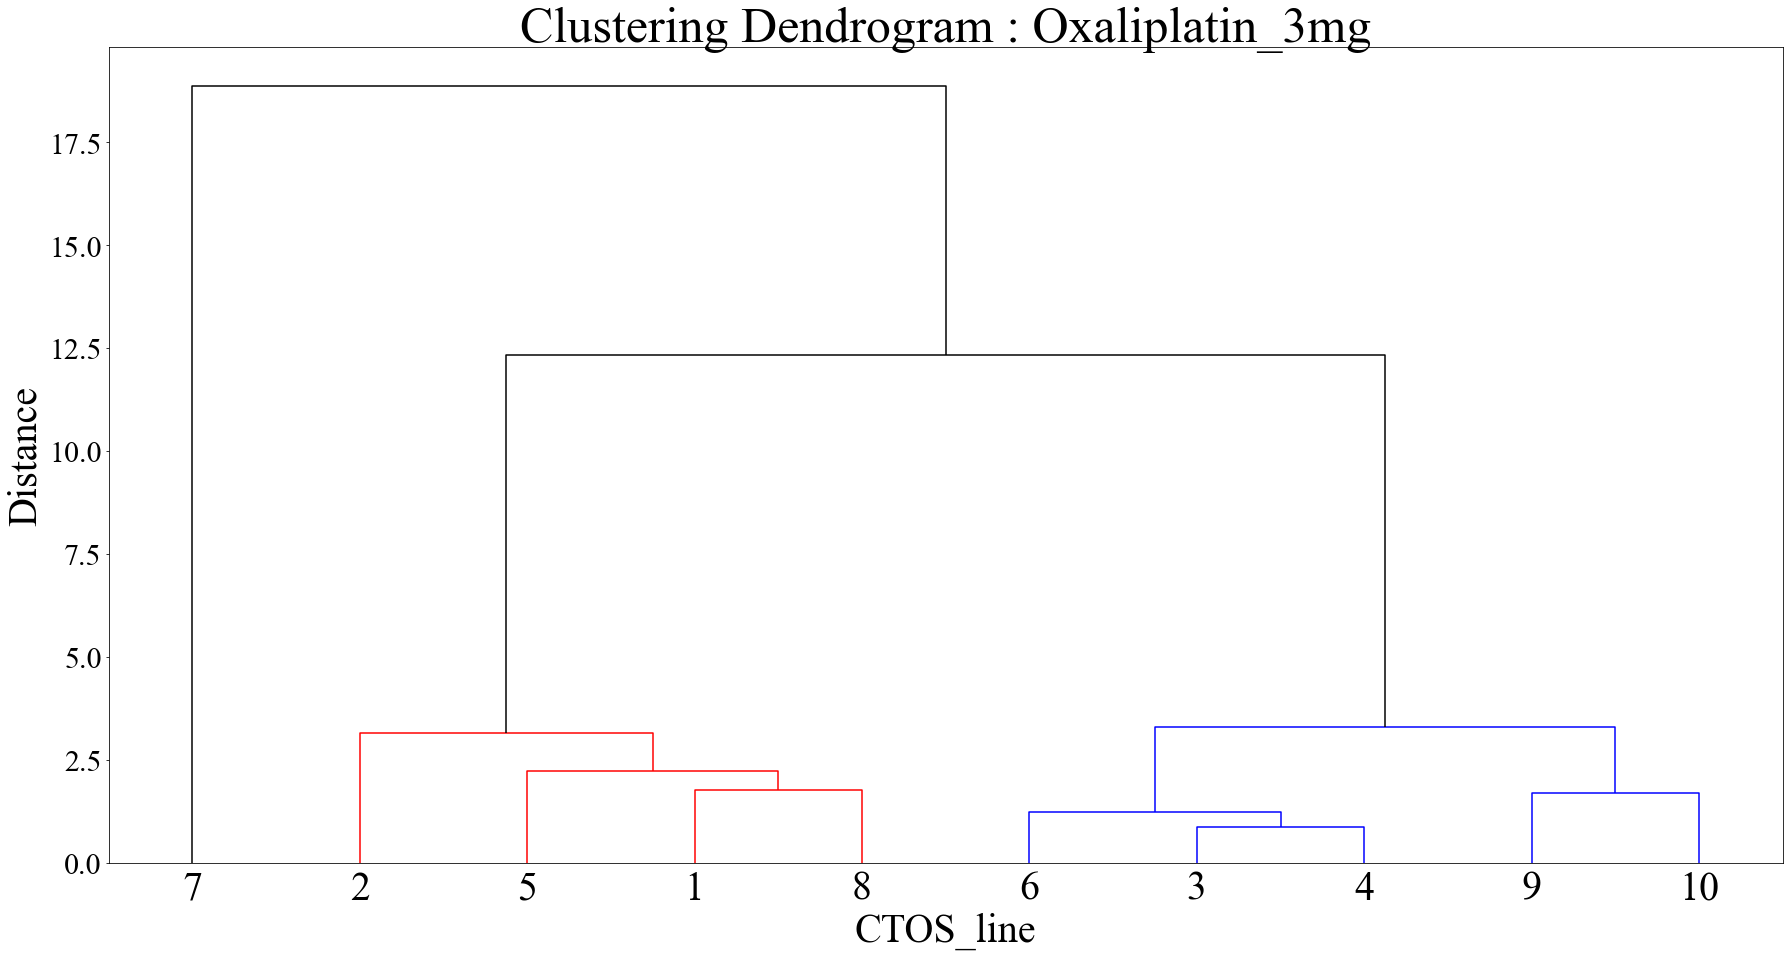

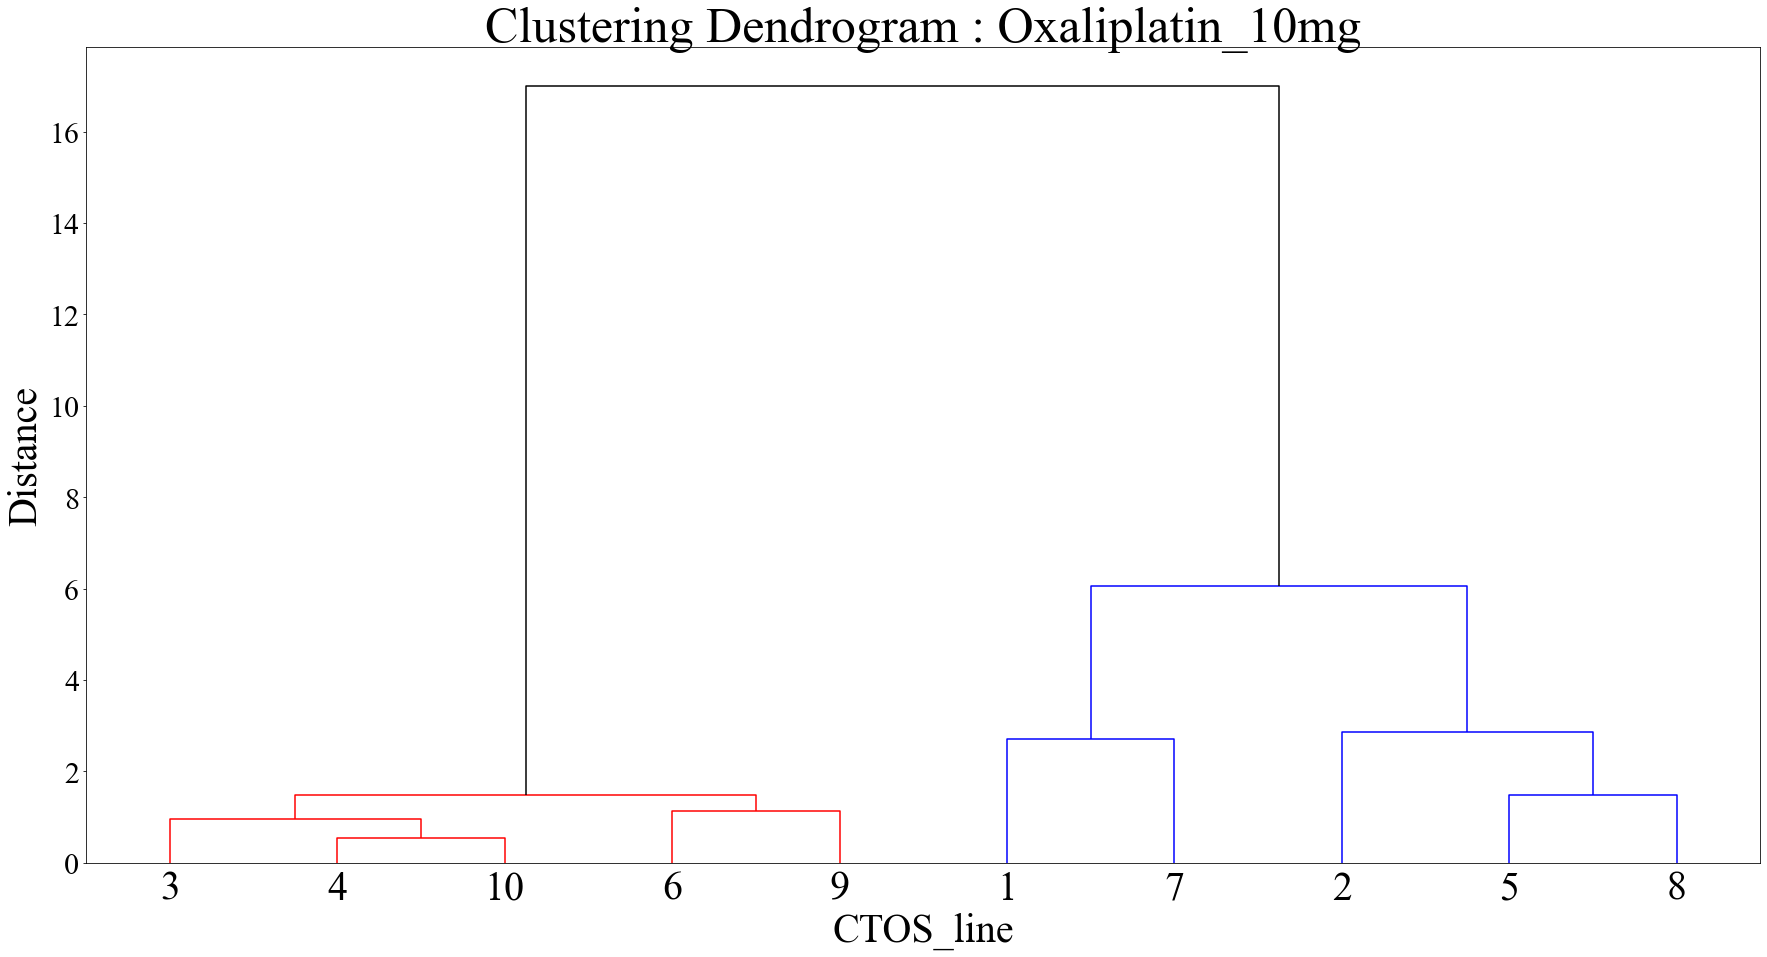

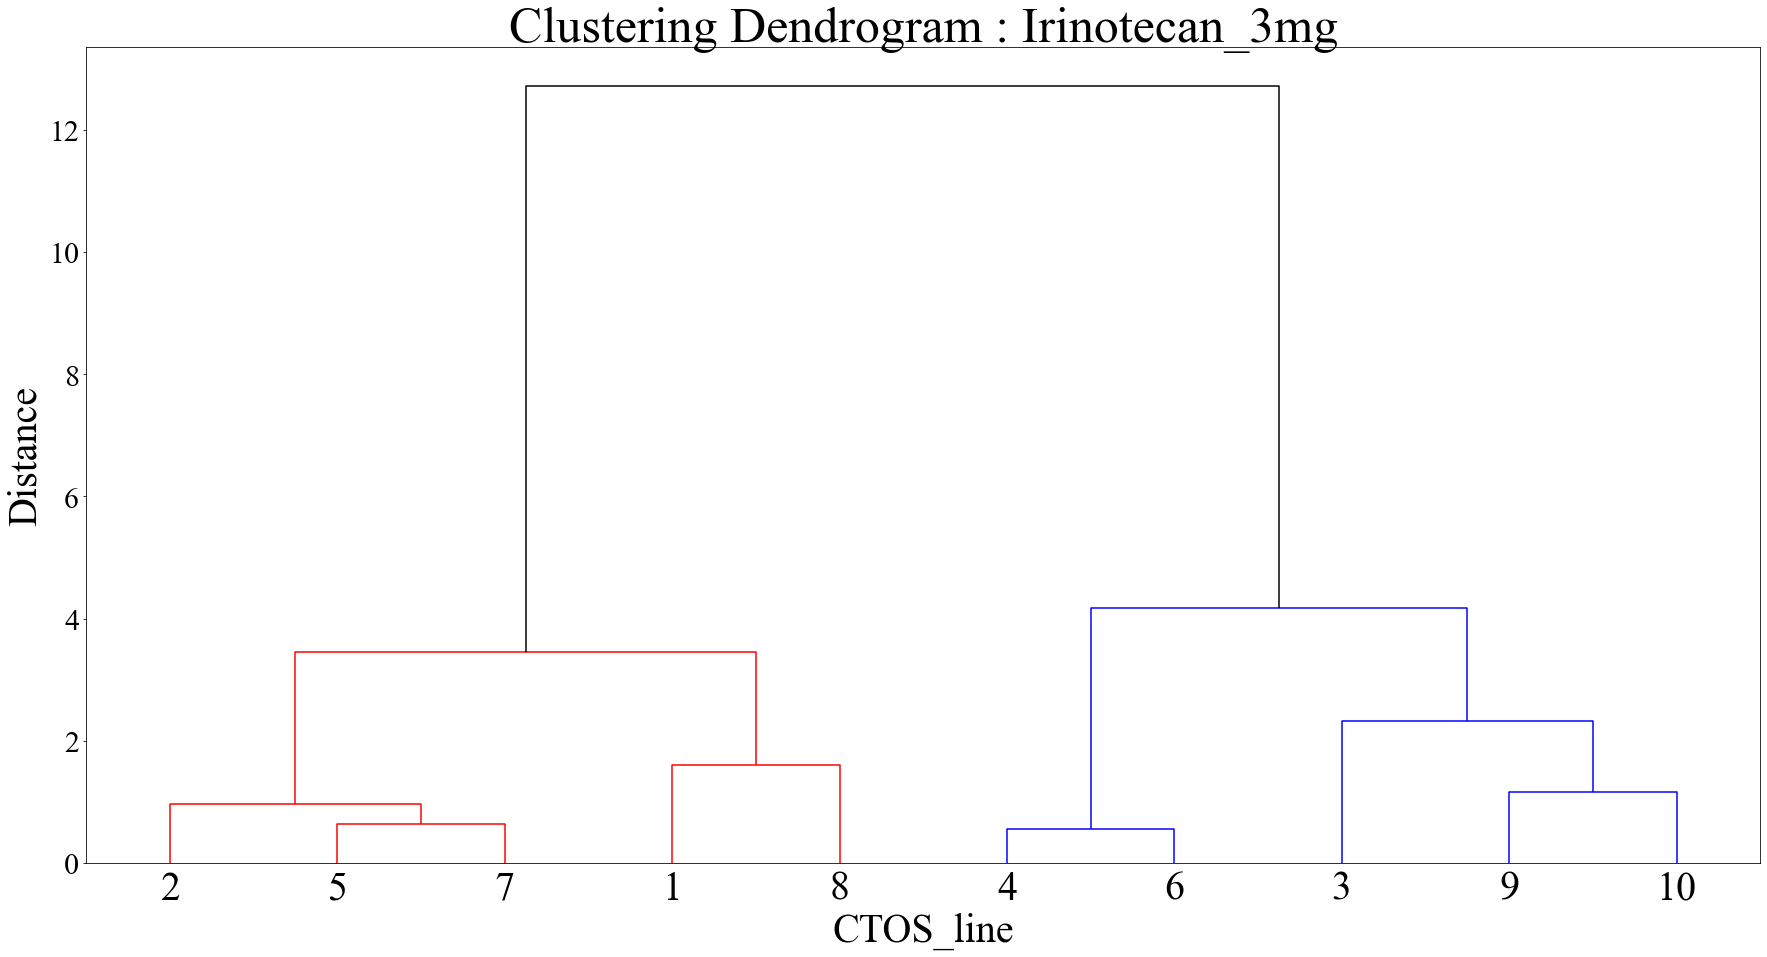

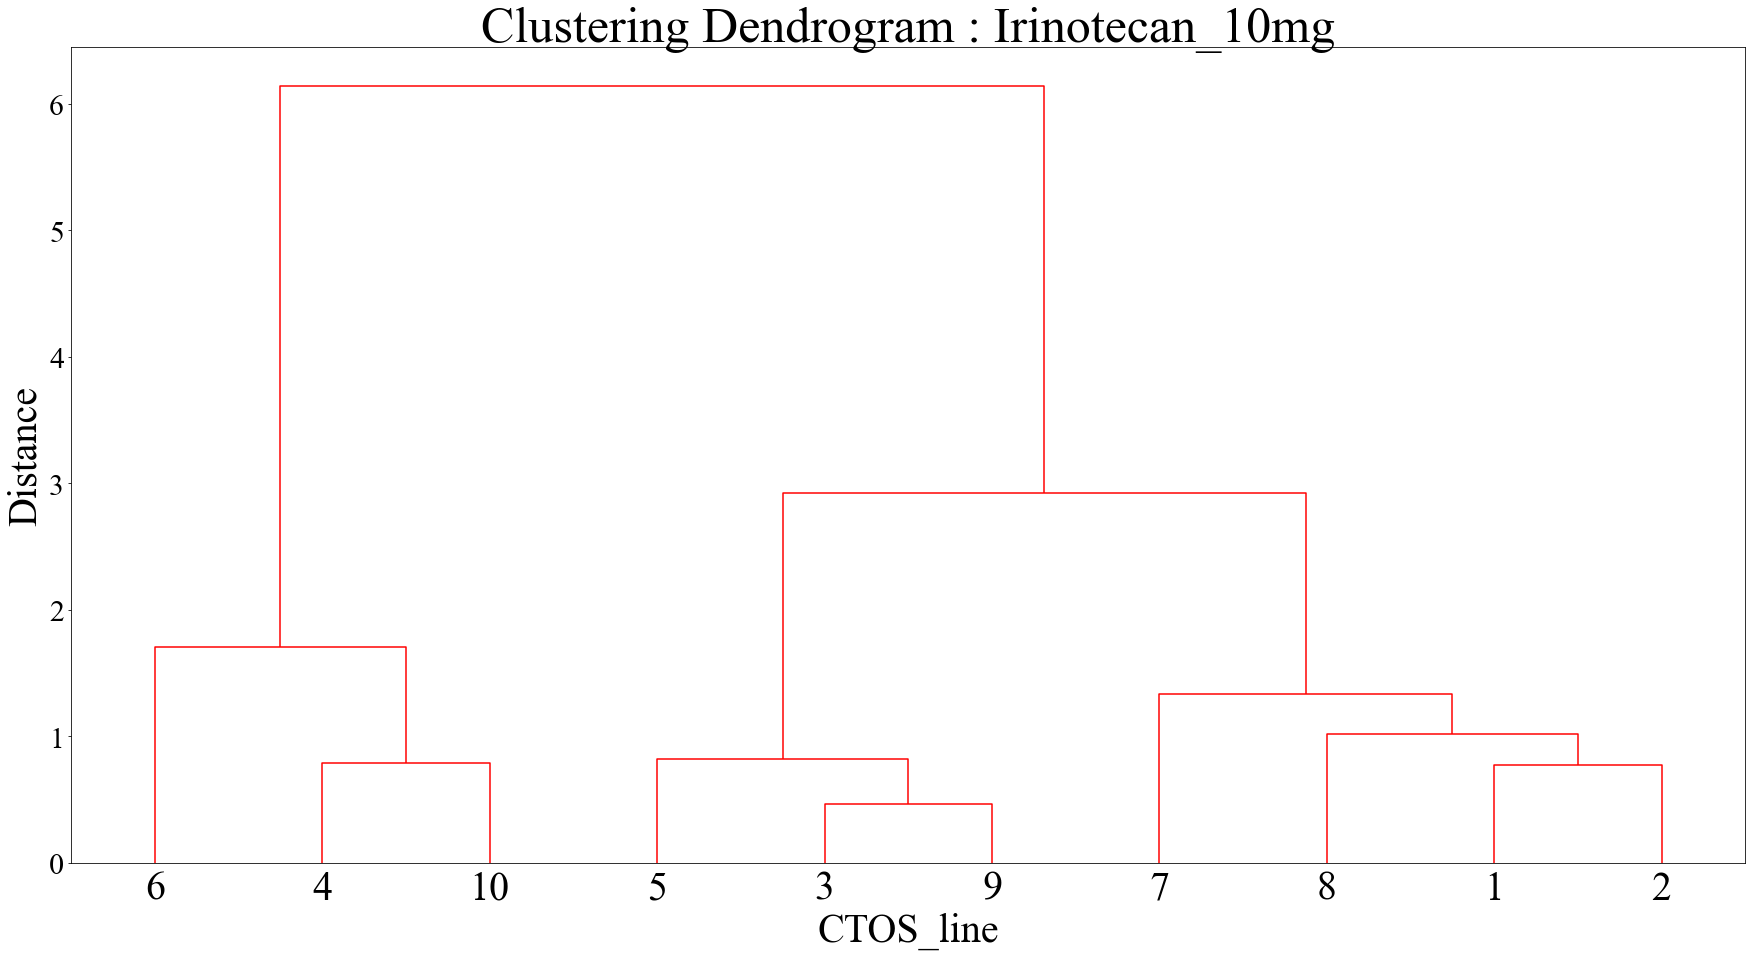

In [3]:
def clustering(data, drug_index):
    for i in range(len(drug_index)):
        # read data
        d = l_gr[i]
        labels = list(d.index)
        # clustering (method = ward)
        z = linkage(d, method='ward')
        # plot
        plt.figure(figsize=(30, 15))
        plt.rcParams["font.family"] = 'sans-serif'
        plt.rcParams['font.size'] = 30
        #plt.rcParams['figure.subplot.bottom'] = 0.30
        plt.title(f'Clustering Dendrogram : {drug_index["drug_name"][i]}', fontsize=50)
        plt.xlabel('CTOS_line', fontsize=40)
        plt.ylabel('Distance', fontsize=40)
        set_link_color_palette(['red', 'blue']) # 2 cluster
        dendrogram(z, leaf_font_size=40, color_threshold=7.,labels=labels, above_threshold_color='black')
        # save & show
        savepath = f'./result/z_fig/clustering_TumorGrowthRate/fig_clustering_{drug_index["drug_name"][i]}.png'
        plt.savefig(savepath, dpi=300, format='png', bbox_inches="tight") # save
        print(f'[SAVE]: {savepath}')
    return

clustering(l_gr, drug_index)